# Visulalisation

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
# Load DataFrame
import pickle
path = './data/df_results.pickle'
with open(path, 'rb') as f:
    df_results = pickle.load(f)

In [9]:
df_results.index = df_results.index.rename('loss_name', level=4)

In [10]:
df_results = (df_results.reset_index()
                        .dropna())

## Desired format :

In [11]:
df_results.head(20)

,method,eta,epsilon,n_steps,loss_name,loss,accuracy
0,pgd_infinity,0.10,1.0,1,mean_squared_error,12.003797,0.0171
1,pgd_infinity,0.10,1.0,1,categorical_crossentropy,12.243128,0.0335
2,pgd_infinity,0.10,1.0,1,kullback_leibler_divergence,12.320941,0.0244
3,pgd_infinity,0.10,1.0,3,mean_squared_error,33.257736,0.0046
4,pgd_infinity,0.10,1.0,3,categorical_crossentropy,29.174820,0.0205
5,pgd_infinity,0.10,1.0,3,kullback_leibler_divergence,38.091328,0.0186
6,pgd_infinity,0.10,1.0,5,mean_squared_error,48.178040,0.0014
7,pgd_infinity,0.10,1.0,5,categorical_crossentropy,29.183500,0.0205
8,pgd_infinity,0.10,1.0,5,kullback_leibler_divergence,51.608791,0.0170
9,pgd_infinity,0.10,1.0,7,mean_squared_error,61.169998,0.0000


In [12]:
# Sanity check
(df_results.epsilon < df_results.eta).sum()
df_results[df_results.epsilon == 0].sum()

method       0.0
eta          0.0
epsilon      0.0
n_steps      0.0
loss_name    0.0
loss         0.0
accuracy     0.0
dtype: float64

In [15]:
# Rename PGD n_step == 1 to FGSM
# These are FGSM since FGSM is PGD with n_step =1
mask_fgsm = df_results.n_steps == 1
df_results.loc[mask_fgsm, 'method', ] = (df_results.loc[mask_fgsm, 'method']
                                                       .str
                                                       .replace('pgd', 'fgsm'))

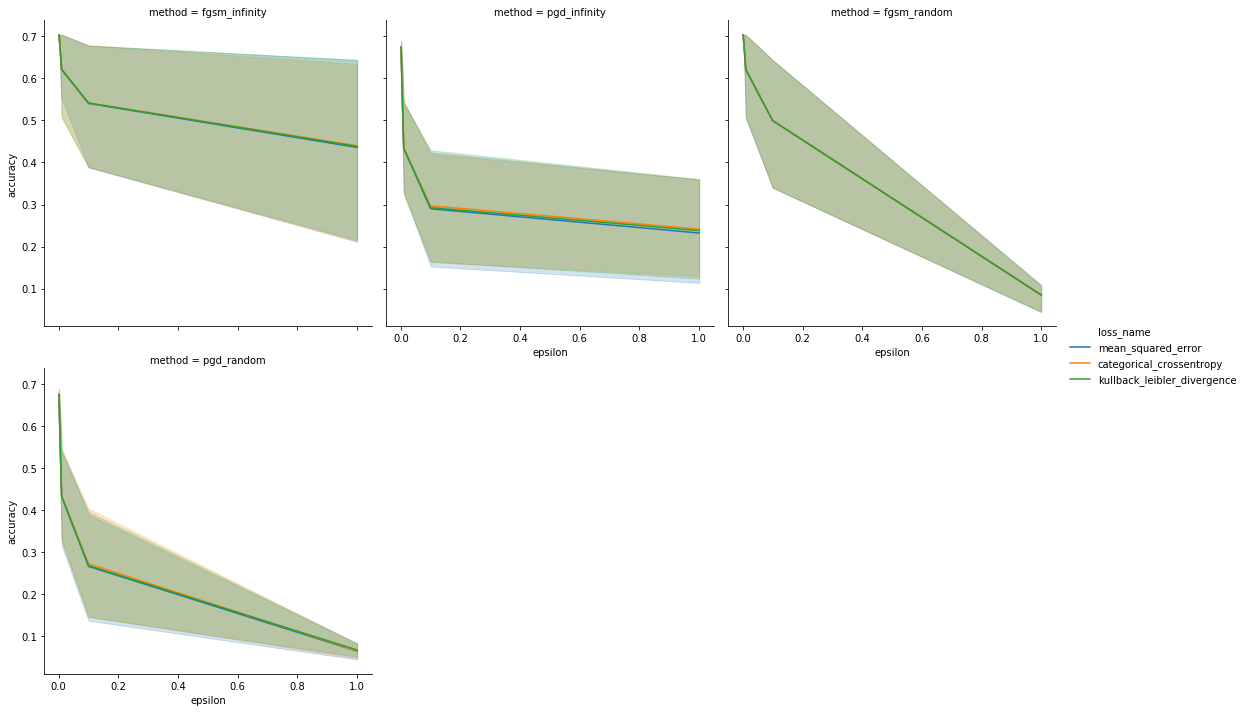

In [24]:
g = sns.relplot(x="epsilon", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.reset_index())

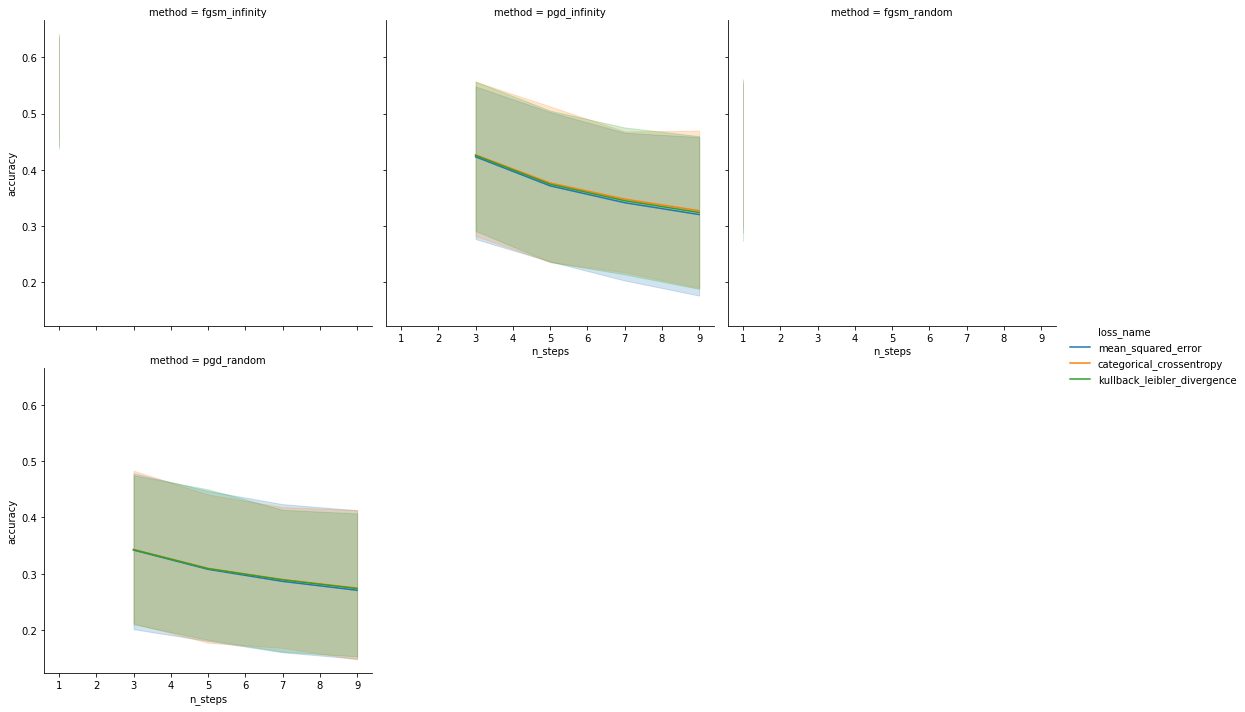

In [25]:
g = sns.relplot(x="n_steps", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.reset_index())

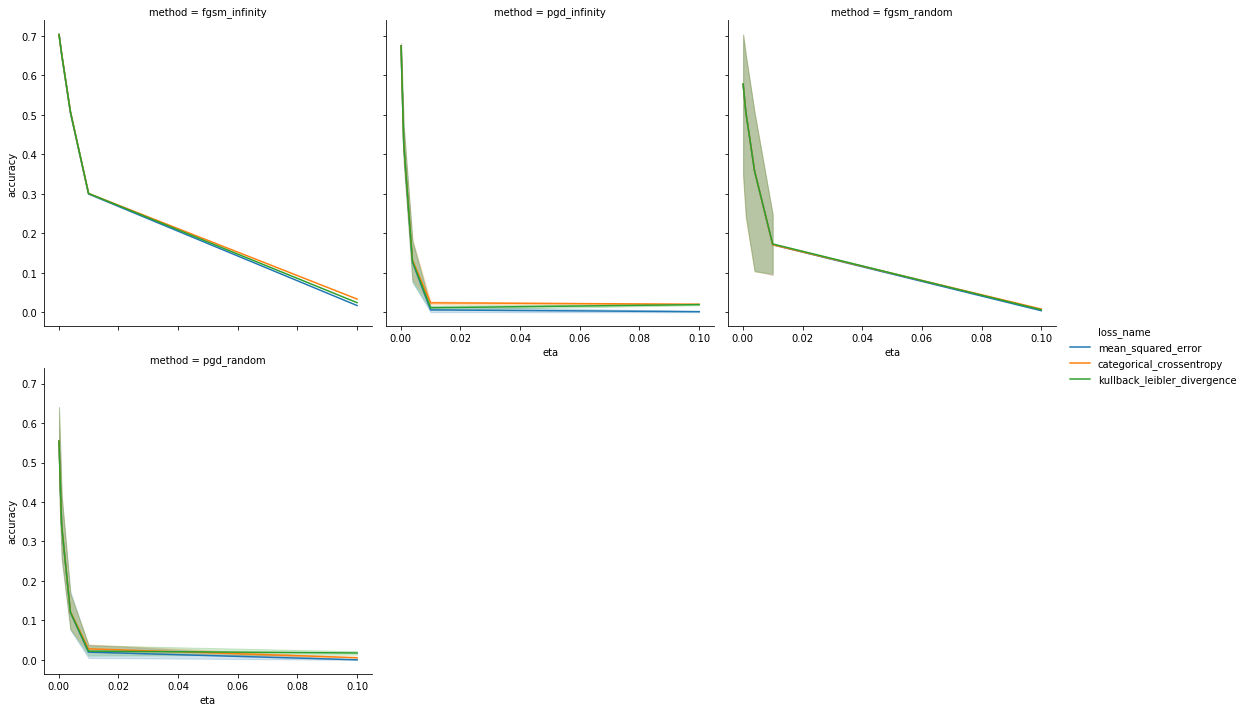

In [26]:
g = sns.relplot(x="eta", y="accuracy",
                 col="method", col_wrap=3, hue='loss_name',
                 kind="line", data=df_results.reset_index())